In [3]:
# Just a couple conepts I should be familiar with
#CDF
#PMF / PDF
#Expected Values
#discrete vs continuous random variables
# VAriance
# standard deviation
#covariance
#correlation
#marginal Distributions

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def fit(x):
    return 3+0.5*x

# Anscomb Info
matplotlib site [https://matplotlib.org/3.2.1/gallery/specialty_plots/anscombe.html] \
Wikipedia [https://en.wikipedia.org/wiki/Anscombe%27s_quartet]

In [6]:
def anscombe():
    x =  np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
    y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
    y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
    y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
    x4 = np.array([8,8,8,8,8,8,8,19,8,8,8])
    y4 = np.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])
    xfit = np.array( [np.amin(x), np.amax(x) ] )
    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.plot(x,y1,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.setp(plt.gca(), xticklabels=[], yticks=(4,8,12), xticks=(0,10,20))
    plt.text(3,12, 'I', fontsize=20)

    plt.subplot(222)
    plt.plot(x,y2,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.setp(plt.gca(), xticklabels=[], yticks=(4,8,12), yticklabels=[], xticks=(0,10,20))
    plt.text(3,12, 'II', fontsize=20)

    plt.subplot(223)
    plt.plot(x,y3,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.text(3,12, 'III', fontsize=20)
    plt.setp(plt.gca(), yticks=(4,8,12), xticks=(0,10,20))

    plt.subplot(224)

    xfit = np.array([np.amin(x4),np.amax(x4)])
    plt.plot(x4,y4,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.setp(plt.gca(), yticklabels=[], yticks=(4,8,12), xticks=(0,10,20))
    plt.text(3,12, 'IV', fontsize=20)

    #verify the stats
    pairs = (x,y1), (x,y2), (x,y3), (x4,y4)
    for x,y in pairs:
        print ('mean=%1.2f, std=%1.2f, r=%1.2f'%(np.mean(y), np.std(y), np.corrcoef(x,y)[0][1]))

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


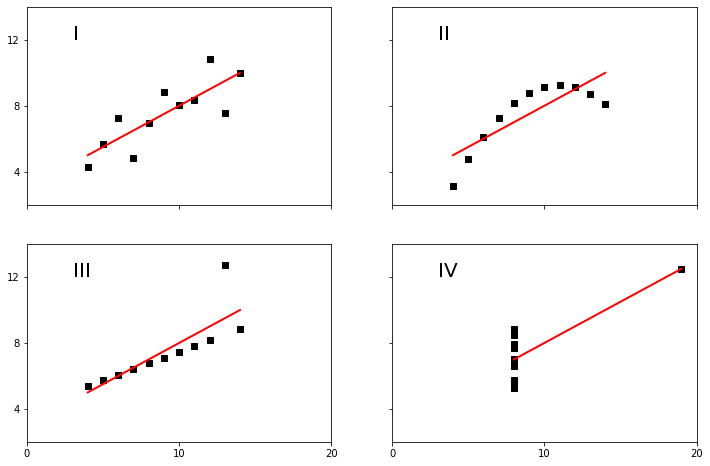

In [9]:
anscombe()

### Using Distributions with Scipy

In [10]:
import scipy.stats as scs

In [11]:
normy = scs.distributions.norm(loc=30,scale = 0.2)

In [12]:
normy

In [13]:
normy.rvs() # generates randome number giving the 

29.799330364543476

In [16]:
# Testing out cumulative distributions 
normy.cdf(29.99)

0.4800611941616244

In [17]:
#Checking PDF 
normy.pdf(29.99)

1.9922195704738193

In [18]:
binom_dist = scs.distributions.binom(n=13,p=0.3)

In [19]:
binom_dist.pmf(5)

0.1802889629540994

In [20]:
binom_dist.cdf(5)

0.8346025236556

In [21]:
normy.ppf(0.08)

29.718985687938073

##### Let's make Bernoulli trials

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
def plot_pmf(dist,x):
    plt.scatter(x,dist.pmf(x),
               edgecolor = 'k')
    plt.vlines(x,0, dist.pmf(x),linestyle=':')
    plt.ylim(bottom=0)
    plt.xlabel('x')
    plt.ylabel('P(x)')
    
def plt_pdf(dist,x):
    plt.plot(x, dist.pdf(x))
    plt.ylim(bottom=0)
    plt.xlabel('x')
    plt.ylabel('pdf')

##### Binomial: Probablity of K successes in N trials

Text(0.5, 0, 'x(number of successes)')

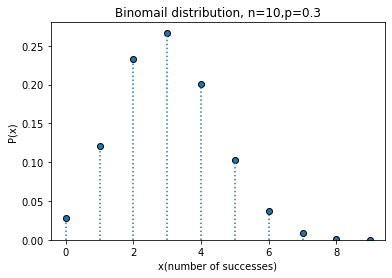

In [30]:
n,p = 10,0.3
binom = scs.distributions.binom(n=n,p=p)
x=np.arange(0,10,1)
plot_pmf(binom,x)
plt.title('Binomail distribution, n={},p={}'.format(n,p))
plt.xlabel('x(number of successes)')

In [31]:
binom.pmf(1)

0.12106082100000018

In [32]:
binom.cdf(4)

0.8497316674

In [33]:
binom.rvs(size=10)

array([3, 4, 4, 6, 3, 4, 3, 6, 4, 5])

In [34]:
binom.ppf(0.9)

5.0

In [35]:
binom.cdf(1)

0.1493083459

In [36]:
binom.cdf(0)

0.028247524899999984

#####  Geometric distribution

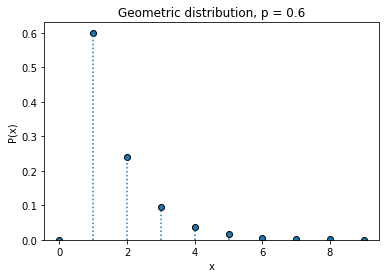

In [39]:
p=0.6
geom = scs.distributions.geom(p=p)
x=np.arange(0,10,1)
plot_pmf(geom,x)
plt.title("Geometric distribution, p = {}".format(p));

##### Poisson distribution

Text(0.5, 1.0, 'Poisson distribution, lambda = 2.3')

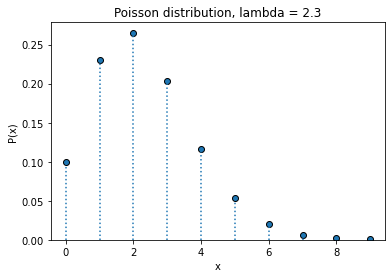

In [41]:
lam = 2.3
#lam = lambda
pois = scs.distributions.poisson(mu=lam)
x=np.arange(0,10,1)
plot_pmf(pois,x)
plt.title('Poisson distribution, lambda = {}'.format(lam))

##### Uniform distribution (Descrete) and (inclusive)

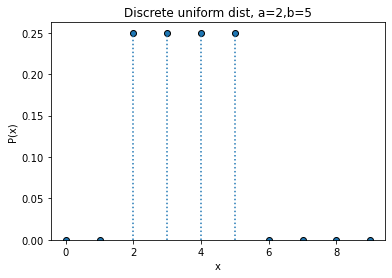

In [44]:
a,b=2,5
unif_dist = scs.randint(a,b+1)
plot_pmf(unif_dist,x)
plt.title('Discrete uniform dist, a={},b={}'.format(a,b));